# PyOR also called Python On Resonance
## Author: Vineeth Francis Thalakottoor
## Email: vineeth.thalakottoor@ens.psl.eu or vineethfrancis.physics@gmail.com
## Example: Shape Pulse (Radiation damping and Relxation)

In [1]:
# Define the source path
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/PyOR/Source_Doc'

# Add source path
import sys
sys.path.append(SourcePath)
import time
%matplotlib ipympl

# Import PyOR package
from PyOR_QuantumSystem import QuantumSystem as QunS
from PyOR_Hamiltonian import Hamiltonian
from PyOR_DensityMatrix import DensityMatrix
from PyOR_QuantumObject import QunObj
from PyOR_HardPulse import HardPulse
from PyOR_Basis import Basis
from PyOR_Evolution import Evolutions
from PyOR_Plotting import Plotting
import PyOR_SignalProcessing as Spro

In [2]:
# Define the spin system
Spin_list = {"A" : "H1"}
QS = QunS(Spin_list,PrintDefault=False)

# initialize the system
QS.Initialize()

In [3]:
# Set Parameters

# Master Equation
QS.PropagationSpace = "Hilbert"
QS.MasterEquation = "Redfield"

# B0 Field in Tesla, Static Magnetic field (B0) along Z
QS.B0 = 9.4

# Offset Frequency in rotating frame (Hz)
QS.OFFSET["A"] = 10.0

# Define initial and final Spin Temperature
QS.I_spintemp["A"] = 300.0
QS.F_spintemp["A"] = 300.0

# Relaxation Process
QS.Rprocess = "Phenomenological"
QS.R1 = 10
QS.R2 = 10

# Radiation Damping
QS.Rdamping = True
QS.RD_xi["A"] = 1000
QS.RD_phase["A"] = 0.0

QS.Update()

Larmor Frequency in MHz:  [-400.22802765]


In [4]:
## Defien Hamiltonian

# generate Larmor Frequencies
QS.print_Larmor = True
Ham = Hamiltonian(QS)

# Rotating Frame Hamiltonian
Hz = Ham.Zeeman_RotFrame()

Larmor Frequency in MHz:  [-400.22802765]


In [5]:
DM = DensityMatrix(QS,Ham)

Thermal_DensMatrix = False

if Thermal_DensMatrix:    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = DM.EquilibriumDensityMatrix(QS.Ispintemp,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = DM.EquilibriumDensityMatrix(QS.Fspintemp,HT_approx)
else:
    rho_in = QS.Az 
    rhoeq = QS.Az

In [6]:
# Shape file
pulseFile = '/opt/topspin4.1.4/exp/stan/nmr/lists/wave/Rsnob.1000' # Rsnob.1000 or square.1000 or Gaus1.1000
pulseLength = 1000.0e-6 
RotatioAngle = 90.0
t, amp, phase = Ham.ShapedPulse_Bruker(pulseFile,pulseLength,RotatioAngle)

Nutation frequency of hard pulse (Hz): 250.0
Scaling Factor: 0.21369571573119997
Maximum nuB1 (Hz): 1169.887749712614
Period corresponding to maximum nuB1 (s): 0.0008547828629247999


In [7]:
plot = Plotting(QS)

/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/PyOR/Source_Doc/PyOR_Plotting.py:318: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=self.PlotFontSize, frameon=False)


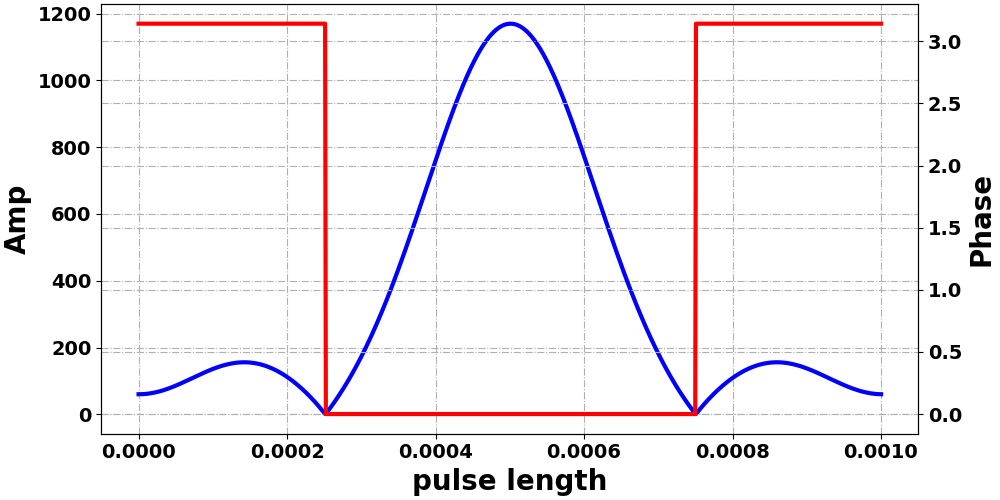

In [8]:

plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.PlottingTwin(t,amp, phase,"pulse length","Amp","Phase","blue","red")

In [9]:
# Interpolartion
Kind = "previous"
Iamp, Iphase = Ham.ShapedPulse_Interpolate(t,amp,phase,Kind)

In [10]:
# Shape Pulse Parameters

EVol = Evolutions(QS,Ham)


EVol.ShapeFunc = "Bruker"
EVol.ShapeParOmega = Iamp
EVol.ShapeParPhase = Iphase
EVol.ShapeParFreq = 0.0

Larmor Frequency in MHz:  [-400.22802765]


In [11]:
# Acquisition parameters
EVol.AcqAQ = pulseLength
Npoints = 1000
EVol.AcqDT = EVol.AcqAQ/Npoints 

EVol.PropagationMethod = "ODE Solver ShapedPulse"

start_time = time.time()
t, rho_t = EVol.Evolution(rho_in,rhoeq,Hz)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 14.475400924682617 seconds 


In [12]:
# Expectation value

t, Mx1 = EVol.Expectation(rho_t,QS.Ax)
t, My1 = EVol.Expectation(rho_t,QS.Ay)
t, Mz1 = EVol.Expectation(rho_t,QS.Az)

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7fba0743a0c0>)

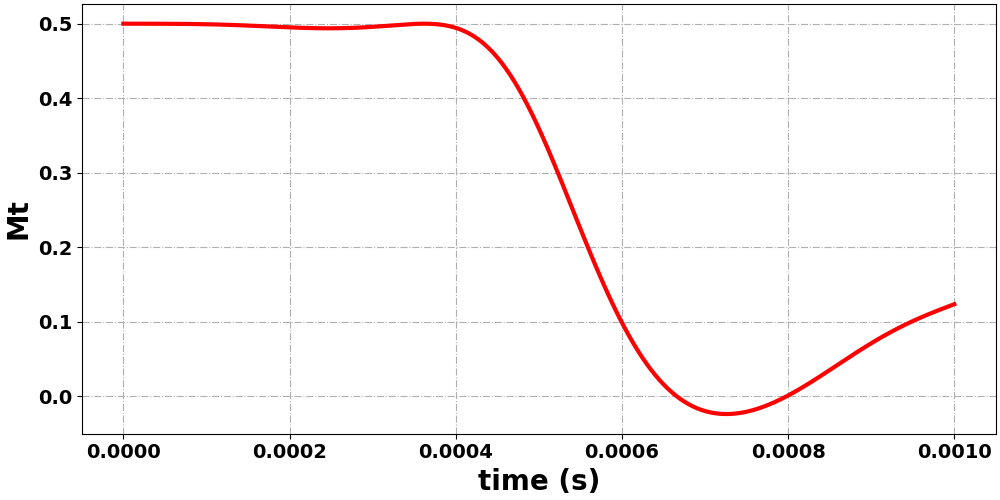

In [13]:

plot.PlotFigureSize = (10,5)
plot.PlotFontSize = 20
plot.Plotting_SpanSelector(t,Mz1,"time (s)","Mt","red") 

/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1222: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1223: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/axes3d.py:3034: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:]).astype(float)


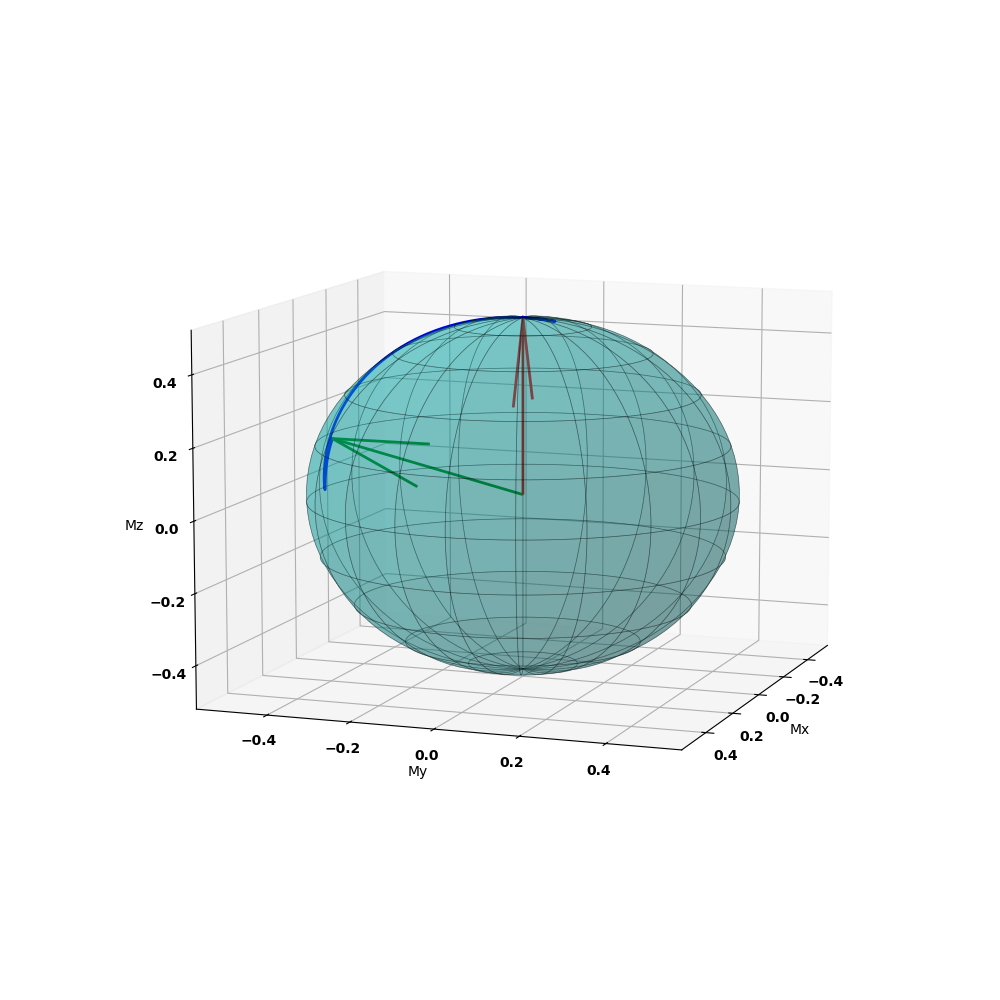

In [14]:
plot.PlotFigureSize = (10,10)
plot.PlotFontSize = 20
plot_vector = False
scale_datapoints = 2
plot.PlottingSphere(Mx1,My1,Mz1,rhoeq,plot_vector,scale_datapoints)